# Práctica 1.4: Umbralización
Equipo:
1. Miguel Ángel Sanchez Zanjuampa
2. Navil Pineda Rugerio

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Imagen original y creacion de hist

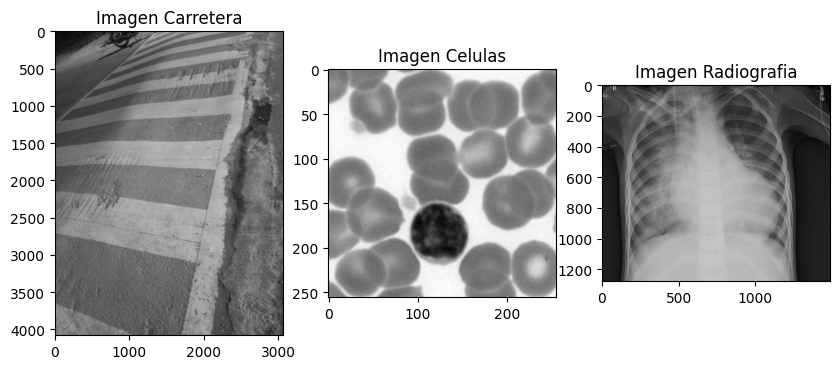

In [26]:
image = cv2.imread('../../IMAGES/20230113_20_57_12_575_000_zGaC6yksz9cwl3UOetH2K4URrOs2_F_4080_3060.jpg', 0)
img1 = np.copy(image)
image = cv2.imread('../../IMAGES/image-cell.png', 0)
img2 = np.copy(image)
image = cv2.imread('../../IMAGES/person_bacteria.jpeg', 0)
img3 = np.copy(image)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img1,  cmap='gray')
ax[0].title.set_text('Imagen Carretera')
ax[1].imshow(img2,  cmap='gray')
ax[1].title.set_text('Imagen Celulas')
ax[2].imshow(img3,  cmap='gray')
ax[2].title.set_text('Imagen Radiografia')

# Técnica de: Umbralización global

In [27]:
def glob(img,valor):
    
    forma = np.shape(img)
    base = np.zeros(forma)
    
    alto, ancho = forma
    
    for i in range(alto):
        for j in range(ancho):
            if(img[i][j] <= valor):
                base[i][j] = 0
            else:
                base[i][j] = 255
    
    return base

bin1 = glob(img1,128)

plt.imshow(bin1, cmap='gray')
plt.title('Imagen con bin global')
plt.axis('off')

# Técnica de: Umbralización global por el método de Otsu

(-0.5, 3059.5, 4079.5, -0.5)

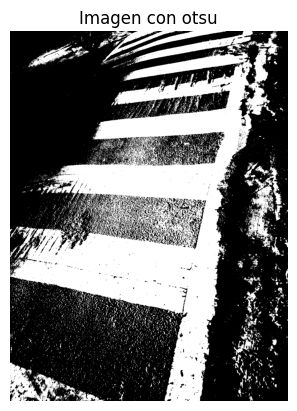

In [ ]:
def otsu(img):
    
    alto, ancho = np.shape(img)

    hist = np.zeros(256)

    for x in range(alto):
        for y in range(ancho):
            intensidad = img[x, y]
            hist[intensidad] += 1


    hist = hist / (ancho * alto)
    
    var = 0
    umbral = 0

    # Buscar el valor optimo dentro de todos los rangos ([1,2],[2,3],[3,4]...)
    for T in range(1, 256):
        
        # Calcular pesos de background y foreground
        # fondo
        w1 = np.sum(hist[:T])    
        # frente
        w2 = np.sum(hist[T:])    
        
        # En los limites el valor es 0, por lo que no se toma en cuenta
        if w1 == 0 or w2 == 0:
            continue
        
        # Calcular medias de bg y fg
        # bg
        x1 = np.sum(np.arange(T) * hist[:T]) / w1
        # fg
        x2 = np.sum(np.arange(T, 256) * hist[T:]) / w2
        
        # Varianza entre bg y fg
        varianza = w1 * w2 * ((x1 - x2) ** 2)
        if varianza > var:
            var = varianza
            umbral = T
            
    # Aplicar el T (umbral) óptimo
    resultado = (img > umbral) * 255

    return resultado

bin2 = otsu(img1)
plt.imshow(bin2, cmap='gray')
plt.title('Imagen con otsu')
plt.axis('off')

# Técnica de: Umbralización local adaptativa por el método de Bernsen

In [ ]:
# Metodo de Bernsen
def bernsen_thresolding(image, k):
    wid, hght = image.shape
    newImage = np.copy(image)

    # Radio de la vecindad
    radius = k//2

    for i in range(radius+1, wid-radius):
        for j in range(radius+1, hght-radius):
            # Definir vecindad
            nb = image[i-radius:i+radius+1,j-radius:j+radius+1]

            # Obtener el maximo y minimo de la vecindad
            minNb = np.min(nb)
            maxNb = np.max(nb)
            
            # Valor de umbral
            tValue = (minNb + maxNb) / 2

            # Diferencia de contraste mayor en la vecindad
            difC = maxNb - minNb

            # Definir si el contraste es menor al minimo pasado como parametro
            if (difC < k):
                nClass = 255 # La vecindad completa es una clase
            else:
                nClass = tValue
            
            # Umbralizar el pixel
            if(image[i,j] < nClass):
                newImage[i,j] = 255
            else:
                newImage[i,j] = 0
    return newImage

C:\Users\SZMik\AppData\Local\Temp\ipykernel_23532\827412529.py:19: RuntimeWarning: overflow encountered in scalar add
  tValue = (minNb + maxNb) / 2


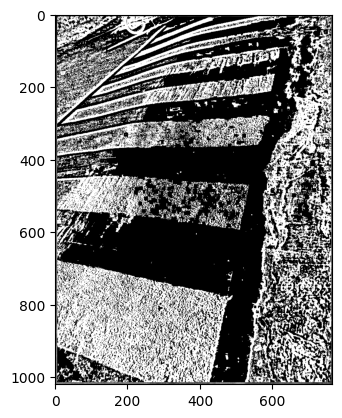

In [ ]:
img1 = cv2.resize(img1,(765, 1020), interpolation = cv2.INTER_LINEAR) # Resize de la imagen para mayor velocidad
imgBernsen1 = bernsen_thresolding(img1, 10)
plt.imshow(imgBernsen1, cmap='gray')

# Aplicar los 3 métodos a las 3 imagenes

In [ ]:
img1 = cv2.resize(img1,(765, 1020), interpolation = cv2.INTER_LINEAR) # Resize de la imagen para mayor velocidad
global1 = glob(img1,128)
global2 = glob(img2,128)
global3 = glob(img3,128)

In [ ]:
otsu1 = otsu(img1)
otsu2 = otsu(img2)
otsu3 = otsu(img3)

In [ ]:
imgBernsen2 = bernsen_thresolding(img2, 8)
imgBernsen3 = bernsen_thresolding(img3, 15)

C:\Users\SZMik\AppData\Local\Temp\ipykernel_23532\827412529.py:19: RuntimeWarning: overflow encountered in scalar add
  tValue = (minNb + maxNb) / 2


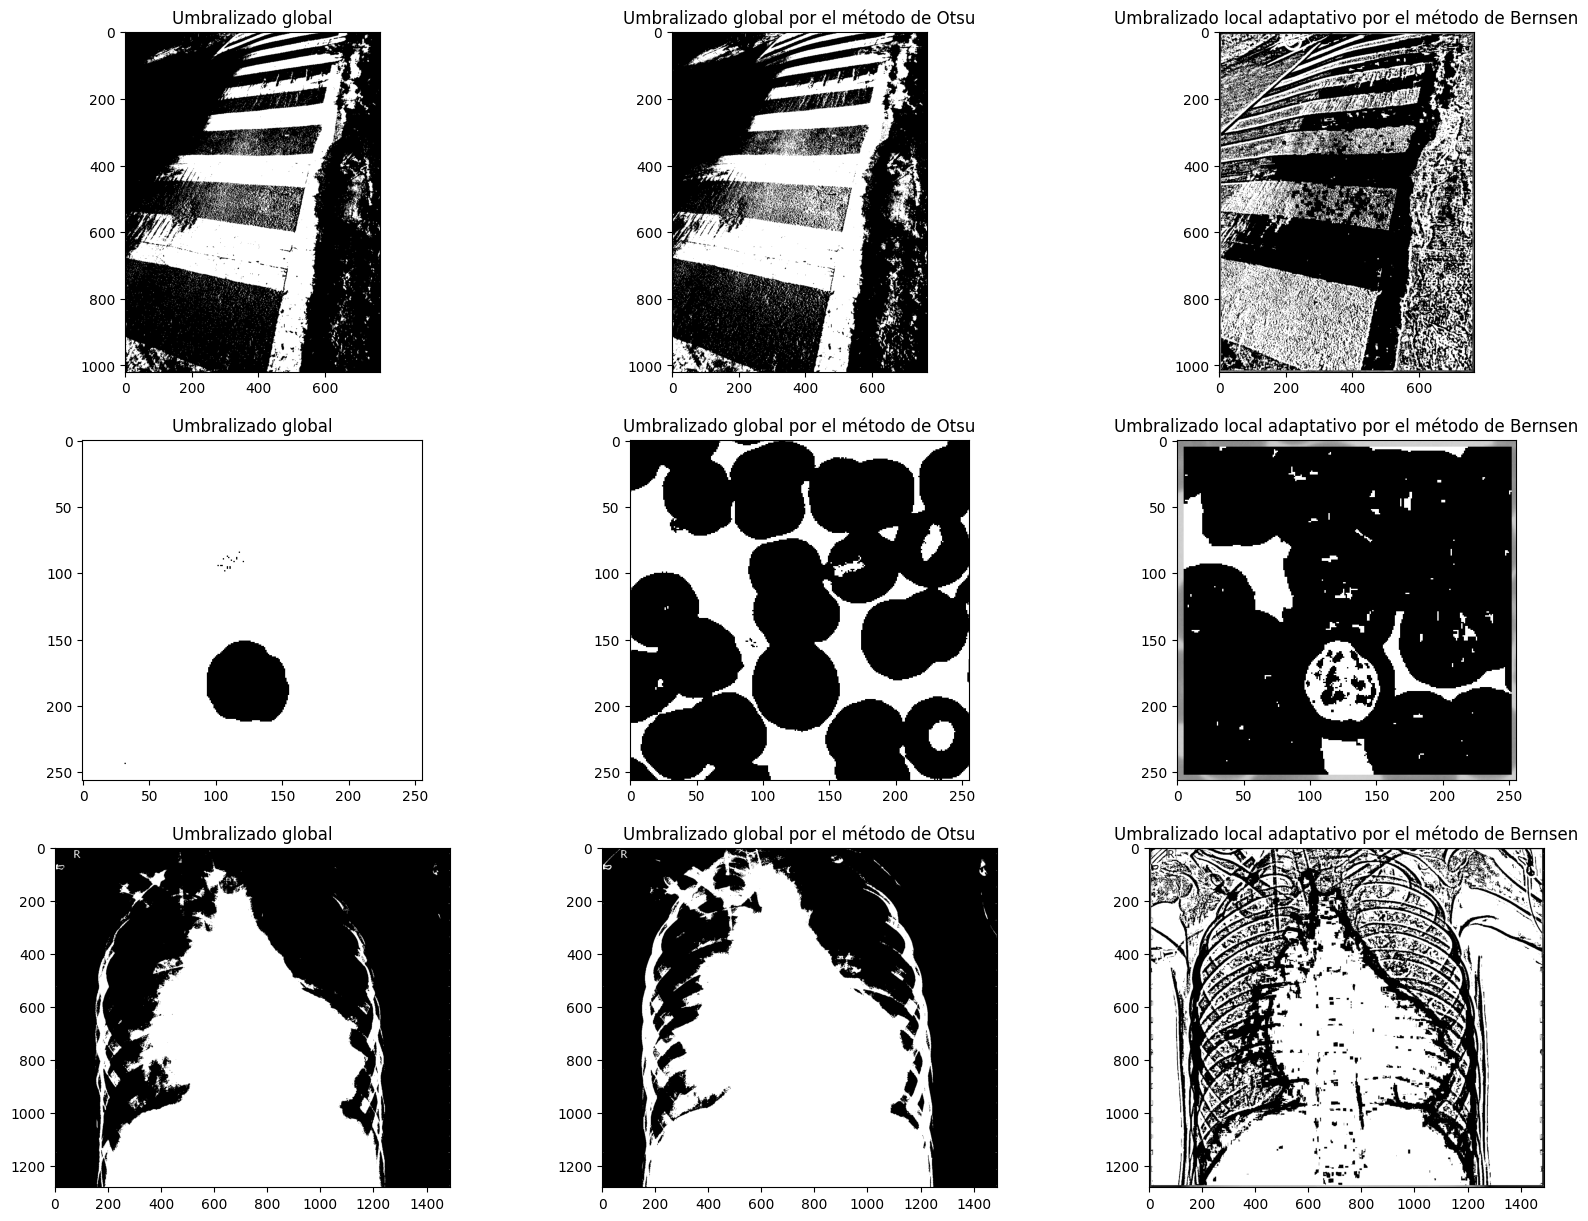

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
ax[0,0].imshow(global1, cmap='gray')
ax[0,0].title.set_text('Umbralizado global')

ax[0,1].imshow(otsu1, cmap='gray')
ax[0,1].title.set_text('Umbralizado global por el método de Otsu')

ax[0,2].imshow(imgBernsen1, cmap='gray')
ax[0,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[1,0].imshow(global2, cmap='gray')
ax[1,0].title.set_text('Umbralizado global')

ax[1,1].imshow(otsu2, cmap='gray')
ax[1,1].title.set_text('Umbralizado global por el método de Otsu')

ax[1,2].imshow(imgBernsen2, cmap='gray')
ax[1,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')


ax[2,0].imshow(global3, cmap='gray')
ax[2,0].title.set_text('Umbralizado global')

ax[2,1].imshow(otsu3, cmap='gray')
ax[2,1].title.set_text('Umbralizado global por el método de Otsu')

ax[2,2].imshow(imgBernsen3, cmap='gray')
ax[2,2].title.set_text('Umbralizado local adaptativo por el método de Bernsen')

In [ ]:
def bin(image2):
    
    # Binarizacion
    _, imgBin = cv2.threshold(image2, 0, 255, cv2.THRESH_OTSU)
    
    # Inversa de binaria
    for i in np.nditer(imgBin, op_flags=['readwrite']):
        i[...] = 255 - i

    return imgBin

def p1(test):
    forma2 = np.shape(test)
    base2 = np.zeros(forma2)
    base3 = np.zeros(forma2)

    alto, ancho = forma2

    # Primer valor
    grupo = 1

    # Llenado de valores
    for y2 in range(alto):
        for x2 in range(ancho):
            
            if test[y2,x2] == 255: # Si el valor en la matriz es 255 (blanco)
                
                if base2[y2,x2-1] != 0: # Si el valor a la izquierda es diferente de 0, toma ese valor
                    base2[y2,x2] = base2[y2,x2-1]
                    #print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
                
                if base2[y2-1,x2] != 0: # Si el valor arriba es diferente de 0, toma ese valor
                    base2[y2,x2] = base2[y2-1,x2]
                    #print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
                
                # Si los valores tanto arriba como a la izquierda son diferentes de 0, elige el menor
                if (base2[y2,x2-1] != 0) and (base2[y2-1,x2] != 0):
                    
                    if(base2[y2,x2-1] < base2[y2-1,x2]): # Si el valor a la izquierda es menor, toma ese valor
                        base2[y2,x2] = base2[y2,x2-1]
                        #print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
                    
                    else: # Caso opuesto (entonces el de arriba es menor)
                        base2[y2,x2] = base2[y2-1,x2]
                        #print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
                
                # Si el valor es 0 (y no tiene vecinos, porque primero se ve si tiene vecinos (codigo de arriba)) entonces asigna el valor de grupo nuevo
                if base2[y2,x2] == 0:
                    base2[y2,x2] = grupo
                    grupo = grupo+1
    return base2

def p2(base2):
    base3 = base2
    
    forma2 = np.shape(base2)
    alto, ancho = forma2
    
    for y2 in range(alto):
        for x2 in range(ancho):
            
            lista = []
            
            if base3[y2,x2] != 0:
                
                lista.append(base3[y2,x2])                
                    
                if(y2>0) and (base3[y2-1][x2] != 0):
                    #[^] Vecino de arriba:
                    lista.append(base3[y2-1][x2])
                    
                if(x2<(ancho-1)) and (base3[y2][x2+1] != 0):
                    #[->] Vecino de la derecha
                    lista.append(base3[y2][x2+1])
                
                if(y2<(alto-1)) and (base3[y2+1][x2] != 0):
                    #[v] Vecino de abajo
                    lista.append(base3[y2+1][x2])
                    
                if(x2>0) and (base3[y2][x2-1] != 0):
                    #[<-] Vecino de la izquierda
                    lista.append(base3[y2][x2-1])

                #print("[",y2,"]","[",x2,"]",lista)
                
                #print("min ",min(lista))
                
                base3[y2,x2] = min(lista)
    return base3

def componentes(yeah):
    return p2(p1(yeah))

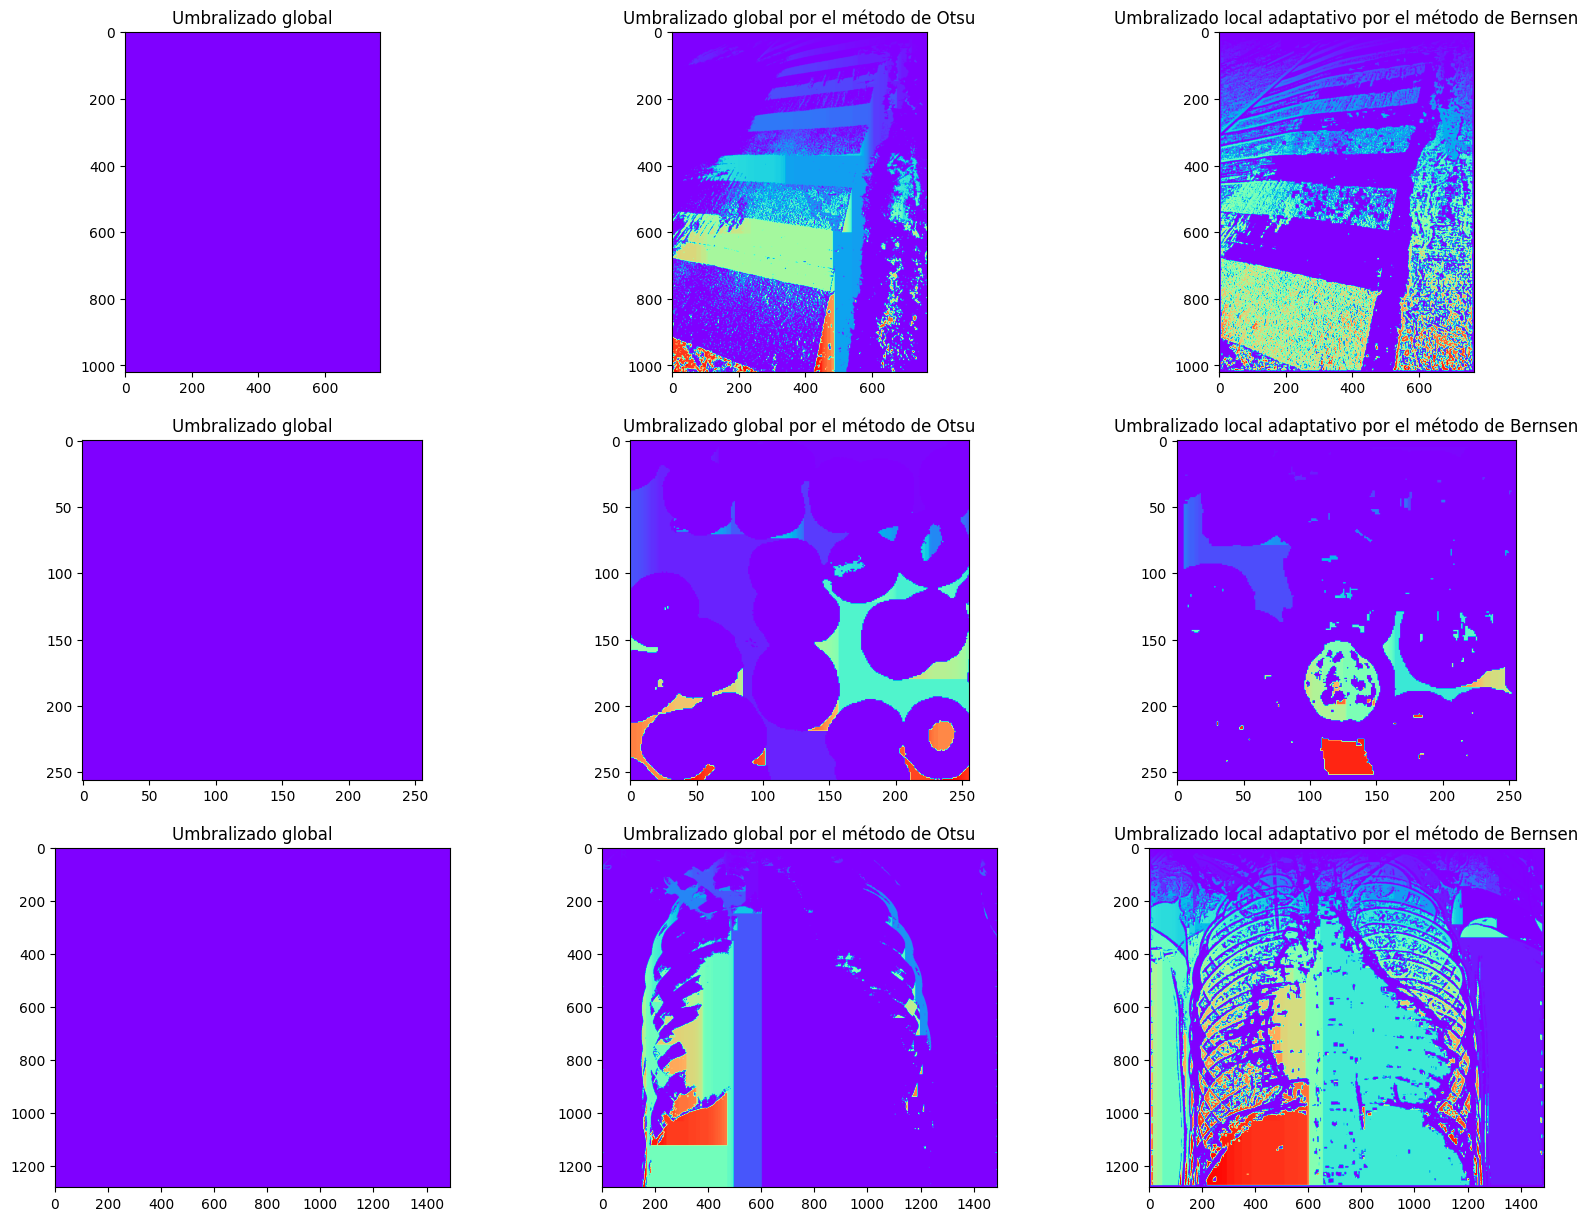

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
ax[0,0].imshow(componentes(global1), cmap='rainbow')
ax[0,0].title.set_text('Global componentes')

ax[0,1].imshow(componentes(otsu1), cmap='rainbow')
ax[0,1].title.set_text('Otsu componentes')

ax[0,2].imshow(componentes(imgBernsen1), cmap='rainbow')
ax[0,2].title.set_text('Bernsen componentes')


ax[1,0].imshow(componentes(global2), cmap='rainbow')
ax[1,0].title.set_text('Global componentes')

ax[1,1].imshow(componentes(otsu2), cmap='rainbow')
ax[1,1].title.set_text('Otsu componentes')

ax[1,2].imshow(componentes(imgBernsen2), cmap='rainbow')
ax[1,2].title.set_text('Bernsen componentes')


ax[2,0].imshow(componentes(global3), cmap='rainbow')
ax[2,0].title.set_text('Global componentes')

ax[2,1].imshow(componentes(otsu3), cmap='rainbow')
ax[2,1].title.set_text('Otsu componentes')

ax[2,2].imshow(componentes(imgBernsen3), cmap='rainbow')
ax[2,2].title.set_text('Bernsen componentes')